In [188]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
matplotlib.use('TkAgg')

In [189]:
def plt_data_t(title, number_of_points):
    plt.title(title, fontsize=10)
    plt.draw()
    pts = np.asarray(plt.ginput(number_of_points, timeout=-1))
    return pts

In [190]:
def populate_data():
    positive, negative = get_data(10)
    X = list()
    Y = list()
    for i in range(len(positive)):
        data = [positive[i][0], positive[i][1], 1]
        X.append(np.array(data))
        Y.append(1)
    for i in range(len(negative)):
        data = [negative[i][0], negative[i][1], 1]
        X.append(np.array(data))
        Y.append(-1)
    return positive, negative, X, Y

In [191]:
def get_data(number_of_points):
    plt.clf()
    plt.setp(plt.gca(), autoscale_on=False)
    positive = plt_data_t("Positive Class", number_of_points)
    negative = plt_data_t("Negative Class", number_of_points)

    plt.title("DATA", fontsize=10)
    plt.scatter(positive[:, 0], positive[:, 1], marker="o")
    plt.scatter(negative[:, 0], negative[:, 1], marker="x")

    plt.draw()
    return positive, negative

#### Get Positive and Negative Data Points, This block of code will load a Interactive GUI which will wait for user to provide input

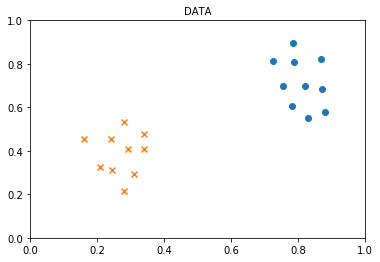

In [192]:
positive, negative, X, Y = populate_data()

*Decision Rule :-* 
$w^T * x$
$$decision =\begin{cases}\text{positive values } & w^T* x \geq 0\\\text{negative values } & w^T* x <  0\end{cases}$$


In [193]:
def decision_rule(w, x):
    return np.dot(w, x)

$$\text{if }y * \text{decision} <= 0 \text{ then }\vec{w}  = \vec{w}  + y * \vec{x}\\ \text{where } decision =\begin{cases}\text{positive values } & w^T* x \geq 0\\\text{negative values } & w^T* x <  0\end{cases}$$


In [194]:
def update(w, x, y):
    w += y * x
    return w

In [196]:
def train(w):
    step = 0
    while True:
        miss_classified = 0
        for iterator in range(len(X)):
            x = X[iterator]
            y = Y[iterator]
            if decision_rule(w, x) * y <= 0:
                # Miss classified the data point and adjust the weight
                w_prev = w
                w = update(w, x, y)
                miss_classified = miss_classified + 1
                print(
                    "Adjusting Weight from w: {} to w_new: {}".format(
                        tuple(w_prev), tuple(w)
                    )
                )        
    #     plt_decision_boundary()
        step += 1
        if miss_classified == 0:
            # if no miss classified then the perceptron has converged and found a hyperplane
            print("Perceptron Converged on Step : {}".format(step))
            break

In [197]:
train(np.array([0.0, 0.0, 0.0]))

Adjusting Weight from w: (0.7855436081242533, 0.8967991169977925, 1.0) to w_new: (0.7855436081242533, 0.8967991169977925, 1.0)
Adjusting Weight from w: (0.5047789725209081, 0.36331861662987497, 0.0) to w_new: (0.5047789725209081, 0.36331861662987497, 0.0)
Adjusting Weight from w: (0.16427718040621275, -0.1149742457689476, -1.0) to w_new: (0.16427718040621275, -0.1149742457689476, -1.0)
Adjusting Weight from w: (0.949820788530466, 0.7818248712288449, 0.0) to w_new: (0.949820788530466, 0.7818248712288449, 0.0)
Adjusting Weight from w: (0.6690561529271208, 0.24834437086092742, -1.0) to w_new: (0.6690561529271208, 0.24834437086092742, -1.0)
Adjusting Weight from w: (1.4545997610513741, 1.1451434878587199, 0.0) to w_new: (1.4545997610513741, 1.1451434878587199, 0.0)
Adjusting Weight from w: (1.1738351254480288, 0.6116629874908024, -1.0) to w_new: (1.1738351254480288, 0.6116629874908024, -1.0)
Perceptron Converged on Step : 4


In [198]:
def slope_intercept():
    a, b, c = tuple(w)
    return -a / b, -c / b

def plt_decision_boundary():
    slope, intercept = slope_intercept()

    x = np.linspace(0, 1)
    y = slope * x + intercept

    plt.plot(x, y, "-r", label="decision boundary")

    plt.scatter(positive[:, 0], positive[:, 1], marker="o")
    plt.scatter(negative[:, 0], negative[:, 1], marker="x")
    plt.title("Graph of Decision Boundary")
    plt.xlabel("x", color="#1C2833")
    plt.ylabel("y", color="#1C2833")
    plt.legend(loc="upper left")
    plt.axis([0.0, 1, 0, 1])


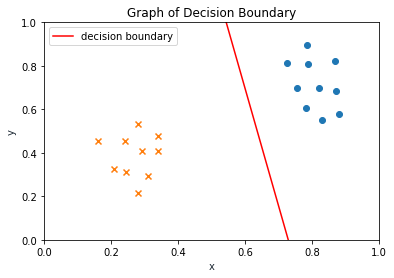

In [199]:
plt_decision_boundary()